# Mushrooms classification -Tensorflow and Keras

This notebook is used to build and train a binary classification neural network using both TensorFlow and Keras. We will train it for the Kaggle - Mushroom Classification project. The data should already be processed and saved to .npy files. See the mushrooms_data_preparation.ipynb notebook from this repository to process the data.

## Import used modules

The only external modules used for this notebook are numpy, tensorflow, and matplotlib.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l2
from pathlib import Path

## Load the processed data

To begin, we need to load the preprocessed data. These files are stored as numpy arrays.


Print data type and arrays shapes.

In [24]:
# Load the data
training_data = np.load('training_data/mushrooms_training_data.npy')
training_labels = np.load('training_data/mushrooms_training_labels.npy')
validation_data = np.load('training_data/mushrooms_validation_data.npy')
validation_labels = np.load('training_data/mushrooms_validation_labels.npy')
test_data = np.load('training_data/mushrooms_test_data.npy')
test_labels = np.load('training_data/mushrooms_test_labels.npy')

# Display a summary of the data
print(f'Training data shape: {training_data.shape}')
print(f'Training labels shape: {training_labels.shape}')
print(f'Validation data shape: {validation_data.shape}')
print(f'Validation labels shape: {validation_labels.shape}')
print(f'Test data shape: {test_data.shape}')
print(f'Test labels shape: {test_labels.shape}')

Training data shape: (6500, 117)
Training labels shape: (6500, 1)
Validation data shape: (812, 117)
Validation labels shape: (812, 1)
Test data shape: (812, 117)
Test labels shape: (812, 1)


## Create model 

In this section, we will define our neural network model using both TensorFlow and Keras. By leveraging the strengths of both libraries, we aim to create a robust and efficient model for binary classification. Here's why we chose to use TensorFlow and Keras together:

TensorFlow: TensorFlow provides a comprehensive ecosystem for building and deploying machine learning models. It offers flexibility and control over the model architecture and training process, making it suitable for complex and large-scale projects.

Keras: Keras, which is now integrated into TensorFlow, offers a high-level API that simplifies the process of building and training neural networks. It allows for rapid prototyping and easy experimentation with different model architectures.

By combining TensorFlow and Keras, we can take advantage of TensorFlow's powerful features while enjoying the simplicity and ease of use provided by Keras.

## Model Components
Our neural network model will include the following components:

- Placeholders: These are the model inputs. When training or evaluating the model, we will feed the graph through these operations with our data.

- Hidden Layers: We will use a stack of fully connected layers. The number, size, and activation function of these layers can be changed from the model parameters variables.

- Output Layer: We will use a fully connected layer with size 1 (one neuron) and a sigmoid activation function (the standard output function for binary classification).

- Cost Computation: We need a TensorFlow operation to calculate the cost of the current model prediction with respect to the real labels. We will use the logarithmic loss for this task.

- Training Operations: These TensorFlow operations will be used to perform one training step (gradients calculation and parameters update) so the model decreases the cost.

- Summaries: We will add TensorBoard summaries to visualize the model graph (architecture), the training process, and some parameters of the model.

- Metrics: We will add operations to check the performance of the model with respect to the true labels we are trying to predict.

## Define and Compile the Model with Keras

We will define the neural network model using Keras, including regularization and dropout layers to prevent overfitting.

In [25]:
# Define the model with Keras
inputs = Input(shape=(training_data.shape[1],), name="inputs")
x = Dense(50, activation='relu', kernel_regularizer=l2(0.01), name="dense_1")(inputs)
x = Dropout(0.5)(x)
x = Dense(50, activation='relu', kernel_regularizer=l2(0.01), name="dense_2")(x)
x = Dropout(0.5)(x)
x = Dense(50, activation='relu', kernel_regularizer=l2(0.01), name="dense_3")(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation="sigmoid", name="outputs")(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Display the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 117)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,051 (43.17 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)

## Define Callbacks

In this section, we will define the callbacks for our model. Callbacks are special functions that are executed during the training process. They allow us to monitor the training, save the best model, log the training history, and use TensorBoard for visualization. Here are the callbacks we will use:

- Model Checkpoint: This callback saves the best model during training based on the validation accuracy.

- CSV Logger: This callback logs the training history to a CSV file.

- TensorBoard: This callback enables TensorBoard for visualizing the training process.

- Early Stopping: This callback stops the training early if the validation accuracy does not improve for a specified number of epochs.

In [26]:
callbacks = []

# Model checkpoint
model_dir = Path(Path.cwd(), "trained_models", "keras_tensorflow")
model_dir.mkdir(exist_ok=True, parents=True)
model_file = "./trained_models/keras_tensorflow/model.keras"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(model_file, monitor='val_accuracy', save_best_only=True)
callbacks.append(model_checkpoint)

# CSV Logger
csv_logger = tf.keras.callbacks.CSVLogger(str(model_dir) + "/training_history.csv")
callbacks.append(csv_logger)

# TensorBoard
tensorboard_log_dir = Path(Path.cwd(), "tensorboard_logs", "keras_tensorflow")
tensorboard_log_dir.mkdir(exist_ok=True)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=str(tensorboard_log_dir), histogram_freq=1, write_graph=True, write_images=True)
callbacks.append(tensorboard_callback)


# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10, mode='max', restore_best_weights=True)
callbacks.append(early_stopping)

## Model training

In [27]:
history = model.fit(training_data, training_labels,
                    epochs=50,
                    validation_data=(validation_data, validation_labels),
                    verbose=2,
                    batch_size=32,
                    callbacks=callbacks,
                    shuffle=True)

Epoch 1/50
204/204 - 3s - 15ms/step - accuracy: 0.5674 - loss: 2.2956 - val_accuracy: 0.2463 - val_loss: 2.2631
Epoch 2/50
204/204 - 1s - 6ms/step - accuracy: 0.6435 - loss: 2.0870 - val_accuracy: 0.6860 - val_loss: 2.0786
Epoch 3/50
204/204 - 1s - 6ms/step - accuracy: 0.7560 - loss: 1.8802 - val_accuracy: 0.9618 - val_loss: 1.8467
Epoch 4/50
204/204 - 1s - 6ms/step - accuracy: 0.8563 - loss: 1.6732 - val_accuracy: 0.9544 - val_loss: 1.6113
Epoch 5/50
204/204 - 1s - 7ms/step - accuracy: 0.9086 - loss: 1.4828 - val_accuracy: 0.9532 - val_loss: 1.4192
Epoch 6/50
204/204 - 1s - 6ms/step - accuracy: 0.9389 - loss: 1.3337 - val_accuracy: 0.9544 - val_loss: 1.2722
Epoch 7/50
204/204 - 1s - 6ms/step - accuracy: 0.9557 - loss: 1.2116 - val_accuracy: 0.9643 - val_loss: 1.1533
Epoch 8/50
204/204 - 1s - 6ms/step - accuracy: 0.9638 - loss: 1.1017 - val_accuracy: 0.9643 - val_loss: 1.0547
Epoch 9/50
204/204 - 1s - 6ms/step - accuracy: 0.9695 - loss: 1.0157 - val_accuracy: 0.9680 - val_loss: 0.9733


## Visualize Training Progress
In this section, we will visualize how the cost and accuracy evolve during the training process for both the training and validation datasets. Although this information is also available in TensorBoard, we will plot it here for convenience.

Note: The training cost and accuracy are calculated for each batch of data, whereas the validation metrics represent the average cost and accuracy across all validation batches.

### Plot Training Cost

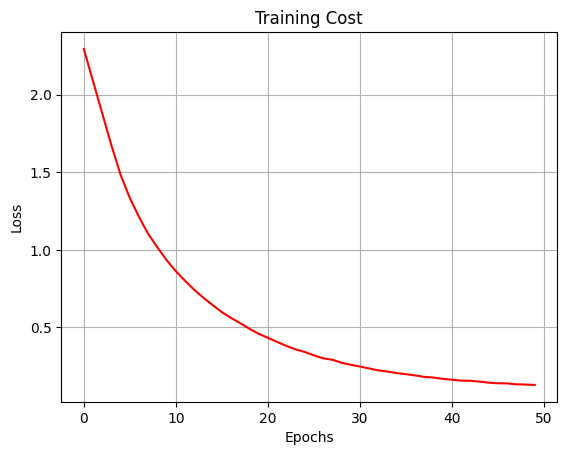

In [28]:
# Plot training cost
plt.plot(range(len(history.history["loss"])), history.history["loss"], color="red")
plt.title("Training Cost")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

### Plot Training Accuracy

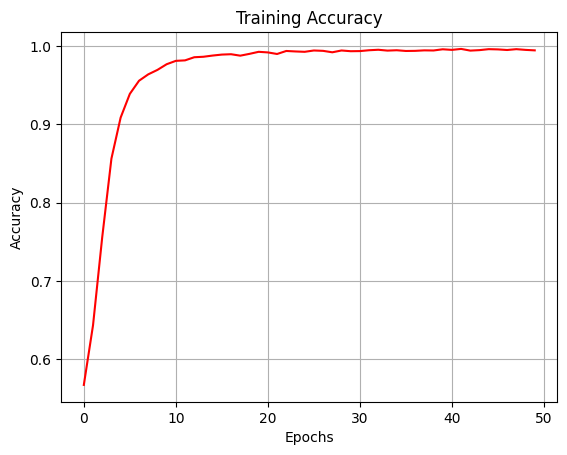

In [29]:
# Plot training accuracy
plt.plot(range(len(history.history["accuracy"])), history.history["accuracy"], color="red")
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

### Plot Validation Cost

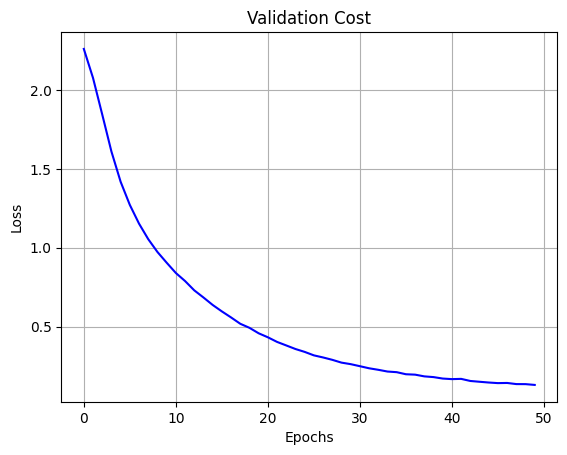

In [30]:
# Plot validation cost
plt.plot(range(len(history.history["val_loss"])), history.history["val_loss"], color="blue")
plt.title("Validation Cost")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

### Plot Validation Accuracy

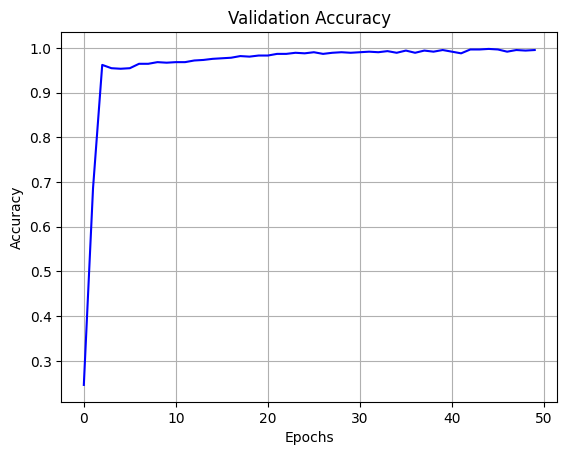

In [31]:
# Plot validation accuracy
plt.plot(range(len(history.history["val_accuracy"])), history.history["val_accuracy"], color="blue")
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

## Test Model

In [32]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9822 - loss: 0.1961
Test Loss: 0.17912611365318298
Test Accuracy: 0.9876847267150879


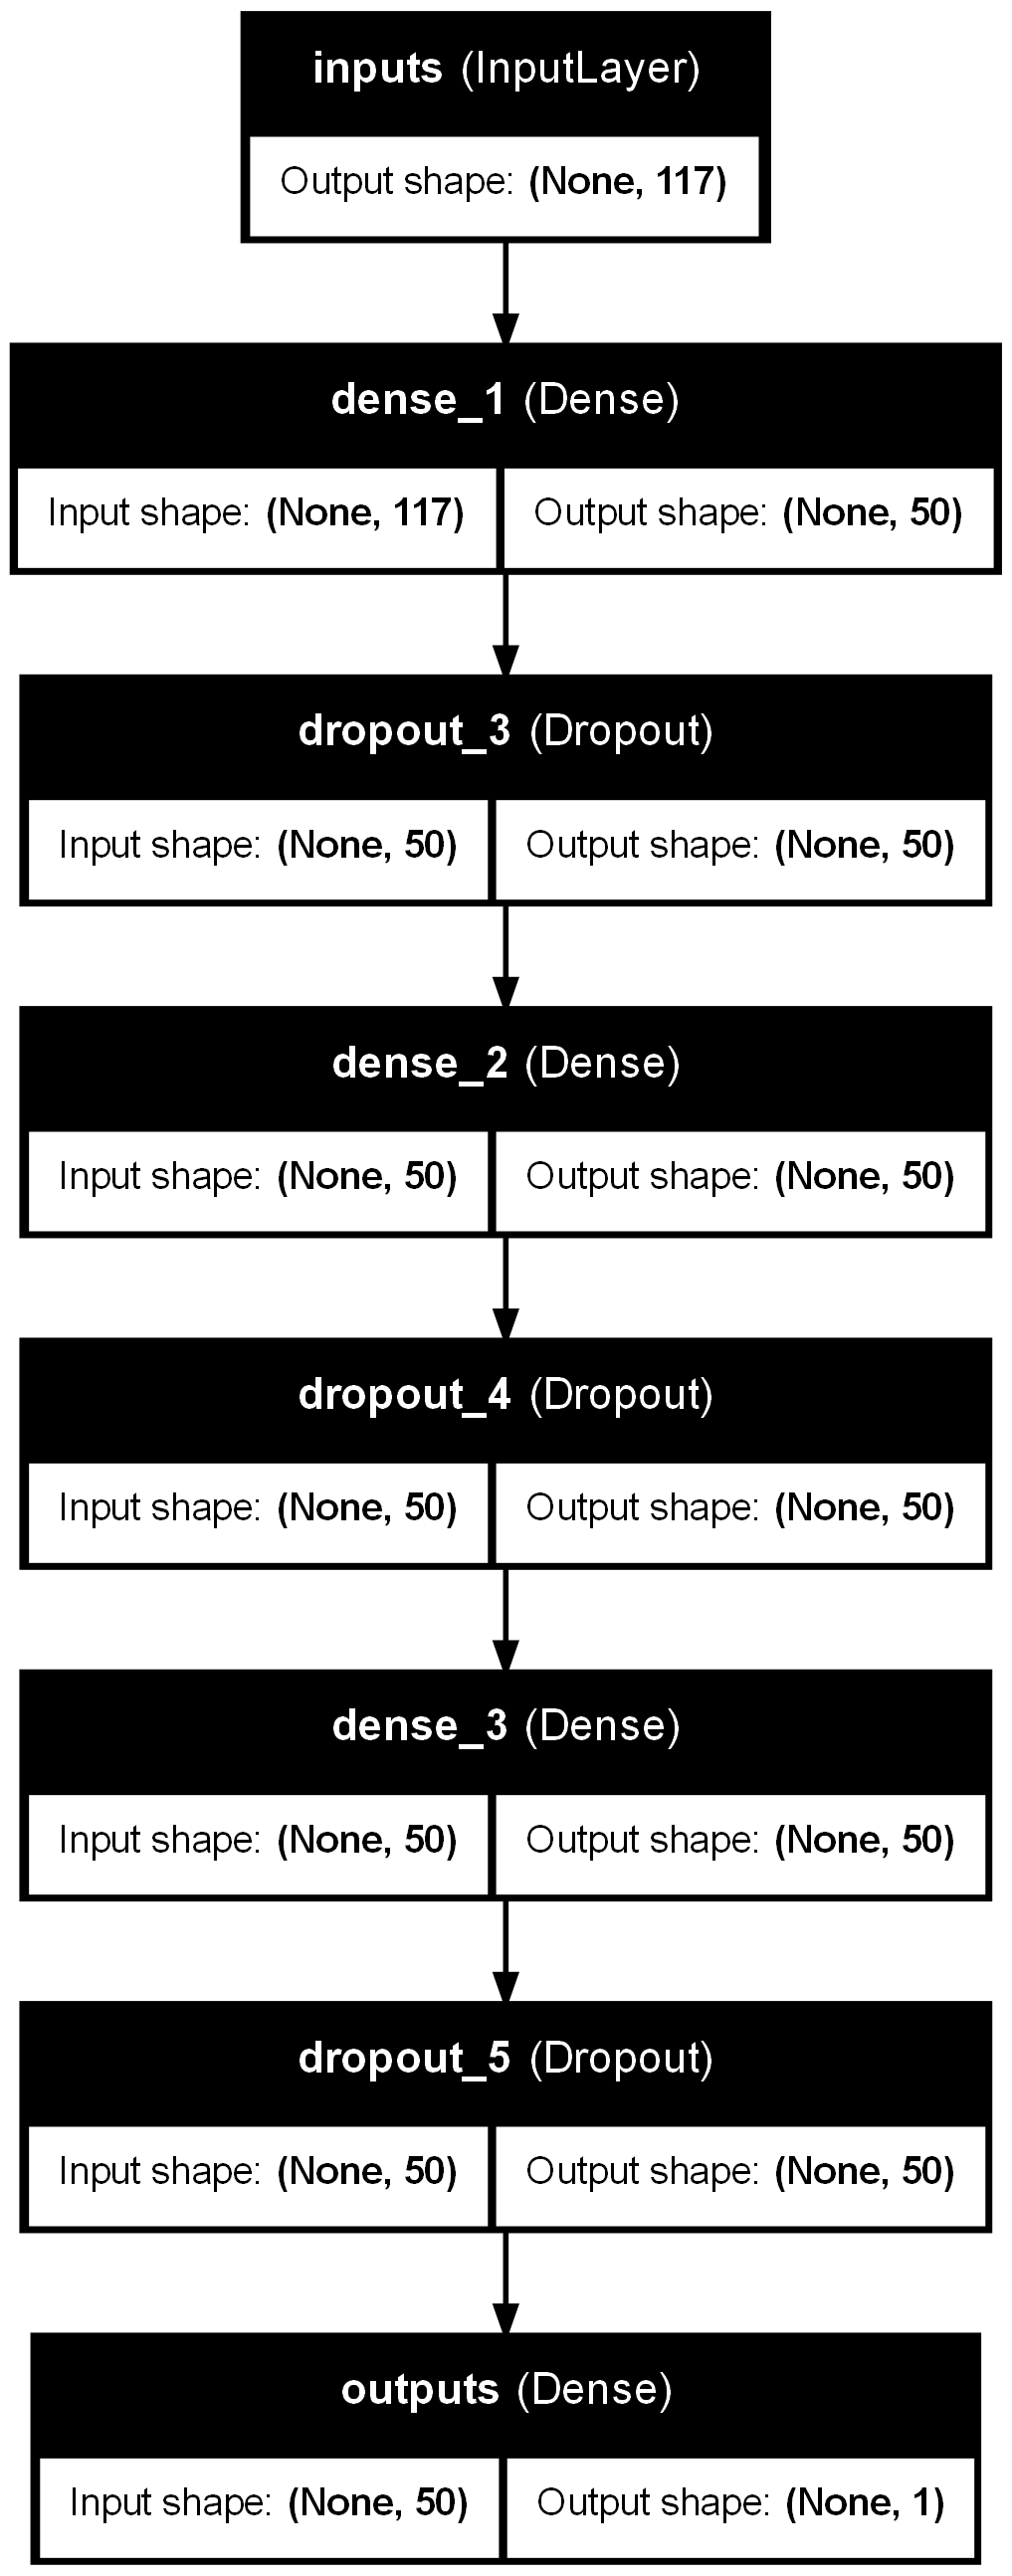

In [33]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

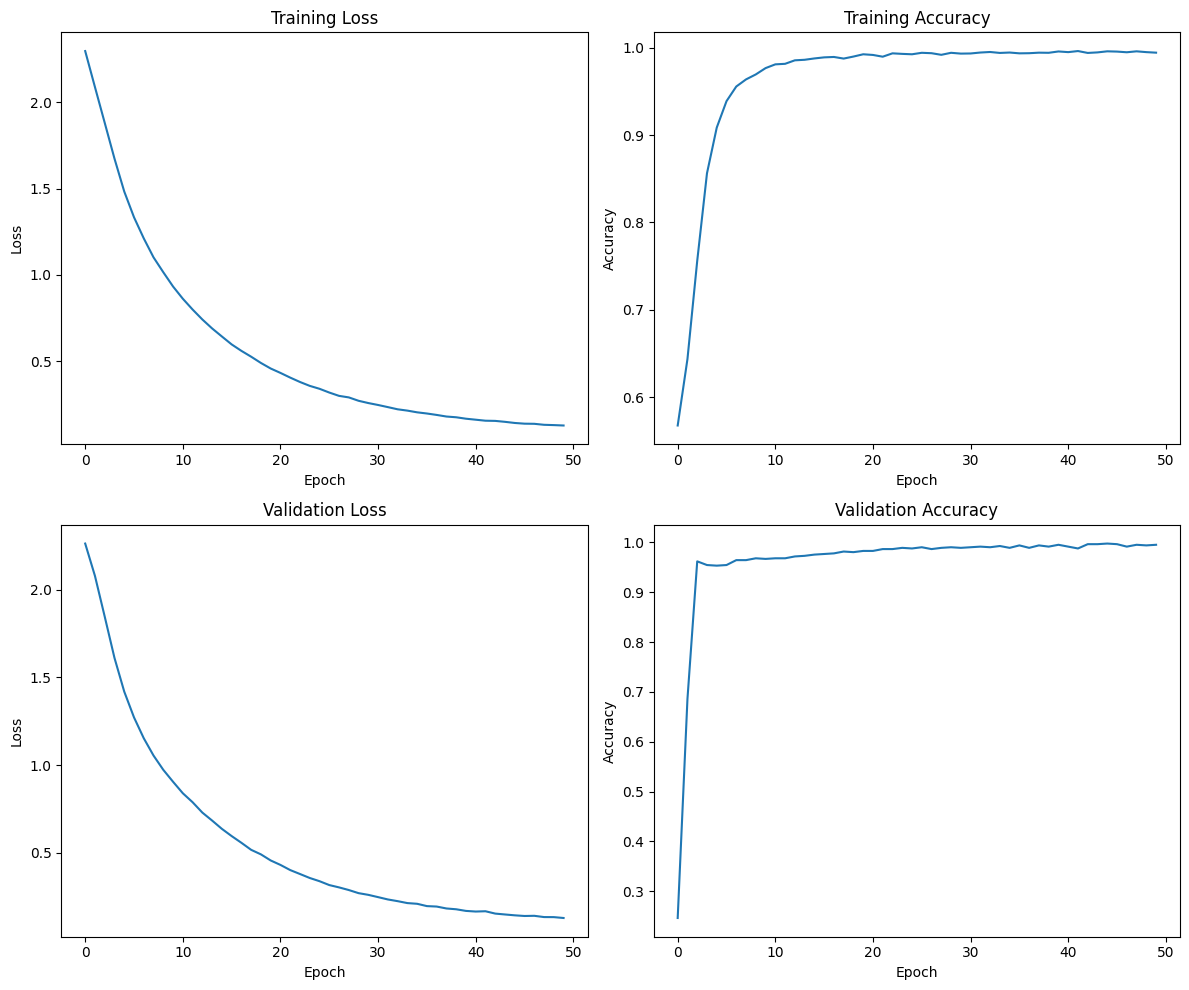

In [35]:
# Crear una figura con 2 filas y 2 columnas de subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico 1: Training Loss
axs[0, 0].plot(history.history['loss'])
axs[0, 0].set_title('Training Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')

# Gráfico 2: Training Accuracy
axs[0, 1].plot(history.history['accuracy'])
axs[0, 1].set_title('Training Accuracy')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Accuracy')

# Gráfico 3: Validation Loss
axs[1, 0].plot(history.history['val_loss'])
axs[1, 0].set_title('Validation Loss')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Loss')

# Gráfico 4: Validation Accuracy
axs[1, 1].plot(history.history['val_accuracy'])
axs[1, 1].set_title('Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()